In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import json
import scipy.stats as st
from config import api_key
import time


In [77]:
#2015 Happiness dataframe
Happy_df_2015 = pd.read_csv("Resources/2015_Clean.csv")

#2016 Happiness dataframe
Happy_df_2016 = pd.read_csv("Resources/2016_Clean.csv")

#2017 Happiness dataframe
Happy_df_2017 = pd.read_csv("Resources/2017_Clean.csv")

#2018 Happiness dataframe
Happy_df_2018 = pd.read_csv("Resources/2018_Clean.csv")

#2019 Happiness dataframe
Happy_df_2019 = pd.read_csv("Resources/2019_Clean.csv")

#2020 Happiness dataframe
Happy_df_2020 = pd.read_csv("Resources/2020_Clean.csv")

#Merging all data sets together
Merge1516_df = pd.merge(Happy_df_2015,Happy_df_2016, on ="country")
Merge1718_df = pd.merge(Happy_df_2017,Happy_df_2018, on ="country")
Merge1920_df = pd.merge(Happy_df_2019,Happy_df_2020, on ="country")
Merge1518_df = pd.merge(Merge1516_df,Merge1718_df, on ="country")
Merge_df = pd.merge(Merge1518_df,Merge1920_df, on ="country")

happiness_report = Merge_df
happiness_report


,country,happiness_score_2015,GDP_per_capita_2015,social_support_2015,life_expectancy_2015,freedom_2015,corruption_2015,generosity_2015,happiness_score_2016,GDP_per_capita_2016,...,freedom_2019,generosity_2019,corruption_2019,happiness_score_2020,GDP_per_capita_2020,social_support_2020,life_expectancy_2020,freedom_2020,generosity_2020,corruption_2020
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,7.509,1.52733,...,0.572,0.263,0.343,7.5599,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946
1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,7.501,1.42666,...,0.591,0.354,0.118,7.5045,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541
2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,7.526,1.44178,...,0.592,0.252,0.410,7.6456,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260
3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,7.498,1.57744,...,0.603,0.271,0.341,7.4880,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101
4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,7.404,1.44015,...,0.584,0.285,0.308,7.2321,1.301648,1.435392,1.022502,0.644028,0.281529,0.351702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,Afghanistan,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,3.360,0.38227,...,0.000,0.158,0.025,2.5669,0.300706,0.356434,0.266052,0.000000,0.135235,0.001226
134,Rwanda,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,3.515,0.32846,...,0.555,0.217,0.411,3.3123,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542
135,Benin,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,3.484,0.39499,...,0.349,0.175,0.082,5.2160,0.366245,0.352428,0.328063,0.405840,0.196670,0.125932
136,Burundi,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,2.905,0.06831,...,0.220,0.176,0.180,3.7753,0.000000,0.403575,0.295213,0.275399,0.187402,0.212187


In [78]:
happyscore_byyear = round(happiness_report.filter(['country','happiness_score_2015','happiness_score_2016', 'happiness_score_2017', 'happiness_score_2018', 'happiness_score_2019', 'happiness_score_2020']),2)
happyscore_byyear.head(10)

,country,happiness_score_2015,happiness_score_2016,happiness_score_2018,happiness_score_2019,happiness_score_2020
0,Switzerland,7.59,7.51,7.49,7.48,7.56
1,Iceland,7.56,7.50,7.50,7.49,7.50
2,Denmark,7.53,7.53,7.56,7.60,7.65
3,Norway,7.52,7.50,7.59,7.55,7.49
4,Canada,7.43,7.40,7.33,7.28,7.23
5,Finland,7.41,7.41,7.63,7.77,7.81
6,Netherlands,7.38,7.34,7.44,7.49,7.45
7,Sweden,7.36,7.29,7.31,7.34,7.35
8,New Zealand,7.29,7.33,7.32,7.31,7.30
9,Australia,7.28,7.31,7.27,7.23,7.22


In [79]:
happyscore_byyear.sort_values(by=['happiness_score_2020'], inplace=True, ascending=False)
happyscore_byyear
happyscore_byyear.head()

,country,happiness_score_2015,happiness_score_2016,happiness_score_2018,happiness_score_2019,happiness_score_2020
5,Finland,7.41,7.41,7.63,7.77,7.81
2,Denmark,7.53,7.53,7.56,7.60,7.65
0,Switzerland,7.59,7.51,7.49,7.48,7.56
1,Iceland,7.56,7.50,7.50,7.49,7.50
3,Norway,7.52,7.50,7.59,7.55,7.49


In [80]:
happyscore_year = happyscore_byyear.rename(columns={'happiness_score_2015': '2015', 'happiness_score_2016': '2016', 'happiness_score_2018':'2018', 'happiness_score_2019': '2019', 'happiness_score_2020': '2020'})
happyscore_year


,country,2015,2016,2018,2019,2020
5,Finland,7.41,7.41,7.63,7.77,7.81
2,Denmark,7.53,7.53,7.56,7.60,7.65
0,Switzerland,7.59,7.51,7.49,7.48,7.56
1,Iceland,7.56,7.50,7.50,7.49,7.50
3,Norway,7.52,7.50,7.59,7.55,7.49
...,...,...,...,...,...,...
111,Botswana,4.33,3.97,3.59,3.49,3.48
127,Tanzania,3.78,3.67,3.30,3.23,3.48
134,Rwanda,3.46,3.52,3.41,3.33,3.31
100,Zimbabwe,4.61,4.19,3.69,3.66,3.30


In [81]:
years = ['2015','2016','2018','2019','2020']

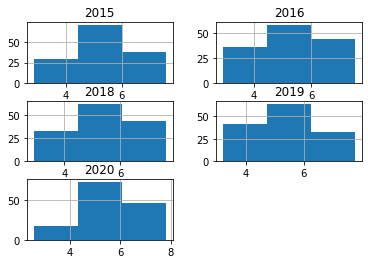

In [83]:
hist = happyscore_year.hist(bins=3)



Text(0.5, 1.0, 'World Happiness Scores 2015-2020')

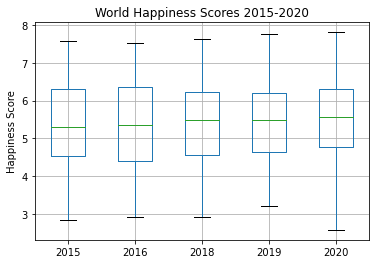

In [86]:
blue_out= dict(markerfacecolor='blue',markersize=12)
box = happyscore_year.boxplot()
plt.ylabel('Happiness Score')
plt.title('World Happiness Scores 2015-2020')


In [49]:
avg_2015 = happyscore_byyear['happiness_score_2015'].mean()
avg_2016 = happyscore_byyear['happiness_score_2016'].mean()
avg_2018 = happyscore_byyear['happiness_score_2018'].mean()
avg_2019 = happyscore_byyear['happiness_score_2019'].mean()
avg_2020 = happyscore_byyear['happiness_score_2020'].mean()

In [50]:
happyyear_df = round(pd.DataFrame ({"2015": [avg_2015], "2016": [avg_2016], "2018": [avg_2018],"2019": [avg_2019], "2020": [avg_2020]}),2)
happyyear_df

,2015,2016,2018,2019,2020
0,5.42,5.41,5.45,5.5,5.55
